In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

Readind the data. S.No assigned as index column

In [2]:
df = pd.read_excel("Game of Thrones.xlsx", index_col="S.No") 
df.head()

,plod,name,title,gender,culture,dateOfBirth,DateoFdeath,mother,father,heir,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [3]:
df.isna().sum()

plod                    0
name                    0
title                1008
gender                  0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [4]:
df.nunique()

plod                  693
name                 1946
title                 262
gender                  2
culture                64
dateOfBirth           134
DateoFdeath            69
mother                 17
father                 20
heir                   22
house                 347
spouse                254
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    85
numDeadRelations       14
boolDeadRelations       2
isPopular               2
popularity            166
isAlive                 2
dtype: int64

Decided to drop some columns. For example name is a useless feature and others has a lot of missing data

In [5]:
df = df.drop(["name", "mother", "father", "heir", "spouse","isAliveMother","isAliveFather","isAliveHeir","isAliveSpouse"], axis=1)

I decided to use Random Forest. So we need to handle categorical values and NaN values.

In [6]:
df.head()

,plod,title,gender,culture,dateOfBirth,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,
1,0.946,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,11,1,1,0.605351,0
2,0.613,Lord of the Crossing,1,Rivermen,208.0,NaN,House Frey,1,1,1,1,1,1,1,97.0,1,1,1,0.896321,1
3,0.507,Ser,1,NaN,NaN,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0,0,0.267559,1
4,0.924,Queen,0,NaN,82.0,105.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0,0.183946,0
5,0.383,Greenstone,0,Dornish,276.0,NaN,House Santagar,0,0,0,1,0,1,1,29.0,0,0,0,0.043478,1


Converting categorical values to numerical. Factorize replaces NaN values with -1. Scikit learn does not handle the NaN values. So I replaced NaN values with -999

In [7]:
df['title'] = pd.factorize(df['title'])[0]
df['culture'] = pd.factorize(df['culture'])[0]
df['house'] = pd.factorize(df['house'])[0]
df = df.fillna(-999)
df = df.replace(-1, -999)
df.head()

,plod,title,gender,culture,dateOfBirth,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,
1,0.946,-999,1,-999,-999.0,-999.0,-999,0,0,0,0,0,0,0,-999.0,11,1,1,0.605351,0
2,0.613,0,1,0,208.0,-999.0,0,1,1,1,1,1,1,1,97.0,1,1,1,0.896321,1
3,0.507,1,1,-999,-999.0,-999.0,1,0,0,0,1,0,0,1,-999.0,0,0,0,0.267559,1
4,0.924,2,0,-999,82.0,105.0,2,0,0,0,0,0,1,1,23.0,0,0,0,0.183946,0
5,0.383,3,0,1,276.0,-999.0,3,0,0,0,1,0,1,1,29.0,0,0,0,0.043478,1


Train test split

In [8]:
X = df.drop(["isAlive"], axis=1)
y = df.isAlive
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(1556, 19)
(390, 19)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [11]:
model = RandomForestClassifier(n_estimators = 100, random_state = 30)

model.fit(X_train, y_train)
prediction_test = model.predict(X_test)


from sklearn import metrics
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
print ("Precision Score = ", metrics.precision_score(y_test, prediction_test))
print ("Recall Score = ", metrics.recall_score(y_test, prediction_test))
print ("F1 score = ", metrics.f1_score(y_test, prediction_test))

Accuracy =  0.9974358974358974
Precision Score =  0.9966329966329966
Recall Score =  1.0
F1 score =  0.9983136593591906


In [12]:
print(prediction_test)

[0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0]


In [13]:
print(y_test)

S.No
1612    0
1404    1
975     0
1056    1
308     1
       ..
619     0
427     1
967     1
850     1
1741    0
Name: isAlive, Length: 390, dtype: int64


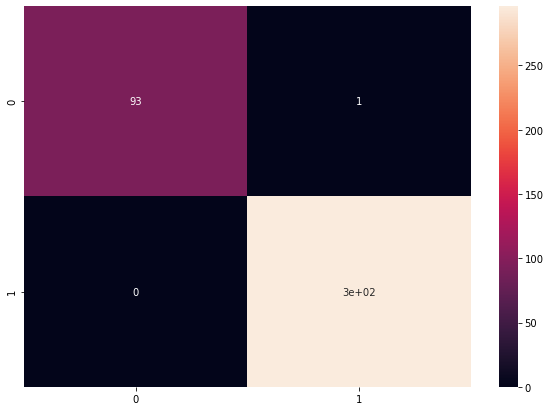

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matr = confusion_matrix(y_test, prediction_test)
plt.figure(figsize = (10,7))
sns.heatmap(conf_matr, annot=True);

Importing results as a Excel file

In [15]:
results = y_test
results = results.to_frame()

results["Prediction"] = prediction_test.tolist()
results.head()
results.to_excel("results.xlsx")